In [1]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [17]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [21]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
import torch

/Users/kal/.pyenv/versions/3.9.0/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
N = torch.zeros((27,27), dtype=torch.int32)

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [16]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color='gray')
plt.axis('off')


NameError: name 'N' is not defined

<Figure size 1600x1600 with 0 Axes>

In [58]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [80]:
p = N[0].float()
p = p / p.sum()
p


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [83]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]


'm'

In [78]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p


tensor([0.6064, 0.3033, 0.0903])

In [82]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([19, 14,  1,  1, 20, 20,  1, 13, 13, 13, 11, 23, 13, 19, 18, 26, 11,  7,
        19,  1])

In [96]:
P.shape

torch.Size([27, 27])

In [139]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [159]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [143]:
P[0].sum()

tensor(1.)

In [160]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [161]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2594
dr: 0.0770 -2.5646
re: 0.1334 -2.0143
ej: 0.0027 -5.9004
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


In [7]:
# create the training set of bigrams
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [8]:
xs

tensor([ 0,  5, 13, 13,  1])

In [10]:
ys

tensor([ 5, 13, 13,  1,  0])

In [11]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
xenc.shape

torch.Size([5, 27])

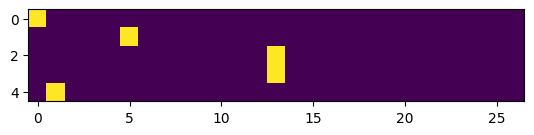

In [15]:
plt.imshow(xenc)

In [16]:
xenc.dtype

torch.float32

In [17]:
W = torch.randn((27,27))
xenc @ W
# (5, 27) @ (27, 27) -> (5, 27)

tensor([[-1.1340, -1.1017,  0.4697,  0.1230,  1.3237,  0.6622, -0.7970,  0.5566,
          0.8053,  1.4136, -0.3071, -1.3023, -0.6692, -0.1115,  0.7591,  0.8659,
         -0.8160,  0.9551, -0.6896, -2.7127,  0.7221,  0.6808, -0.5112,  0.1610,
         -0.8329, -0.0304, -1.0548],
        [-0.3898,  2.2236,  1.4256,  2.2869, -0.3780,  1.0701, -0.6432, -1.8294,
          2.1050,  2.1849, -0.1965, -1.0354, -1.4093, -0.5012,  0.3578,  1.6774,
          0.4730,  1.0936, -0.3049, -0.1002,  0.1517,  0.5989,  1.5704, -1.6236,
         -0.9755, -1.2015,  0.5293],
        [-1.2463, -1.0955,  0.6841, -0.5884, -0.1272, -0.3348,  0.2759,  0.9919,
         -0.7432,  0.4585,  0.6955,  0.1637, -0.0502, -2.8267,  2.2383, -0.1411,
         -0.0781, -1.6419, -0.0948, -0.7885, -1.1183,  1.2493,  0.4899,  1.0805,
          0.1645, -0.0293,  0.1675],
        [-1.2463, -1.0955,  0.6841, -0.5884, -0.1272, -0.3348,  0.2759,  0.9919,
         -0.7432,  0.4585,  0.6955,  0.1637, -0.0502, -2.8267,  2.2383, -0.1411

In [18]:
logits = (xenc @ W) # log-counts
counts = logits.exp() # N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0090, 0.0093, 0.0448, 0.0317, 0.1052, 0.0543, 0.0126, 0.0488, 0.0626,
         0.1151, 0.0206, 0.0076, 0.0143, 0.0250, 0.0598, 0.0665, 0.0124, 0.0728,
         0.0140, 0.0019, 0.0576, 0.0553, 0.0168, 0.0329, 0.0122, 0.0272, 0.0097],
        [0.0096, 0.1307, 0.0588, 0.1392, 0.0097, 0.0412, 0.0074, 0.0023, 0.1161,
         0.1257, 0.0116, 0.0050, 0.0035, 0.0086, 0.0202, 0.0757, 0.0227, 0.0422,
         0.0104, 0.0128, 0.0165, 0.0257, 0.0680, 0.0028, 0.0053, 0.0043, 0.0240],
        [0.0073, 0.0085, 0.0502, 0.0141, 0.0223, 0.0181, 0.0334, 0.0683, 0.0120,
         0.0401, 0.0508, 0.0298, 0.0241, 0.0015, 0.2376, 0.0220, 0.0234, 0.0049,
         0.0230, 0.0115, 0.0083, 0.0884, 0.0413, 0.0746, 0.0299, 0.0246, 0.0300],
        [0.0073, 0.0085, 0.0502, 0.0141, 0.0223, 0.0181, 0.0334, 0.0683, 0.0120,
         0.0401, 0.0508, 0.0298, 0.0241, 0.0015, 0.2376, 0.0220, 0.0234, 0.0049,
         0.0230, 0.0115, 0.0083, 0.0884, 0.0413, 0.0746, 0.0299, 0.0246, 0.0300],
        [0.0200, 0.1176,

In [19]:
probs.shape

torch.Size([5, 27])

In [20]:
# SUMMARY ----------------------->>

In [21]:
xs

tensor([ 0,  5, 13, 13,  1])

In [22]:
ys

tensor([ 5, 13, 13,  1,  0])

In [23]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [24]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# last two lines here are called softmax


In [25]:
probs.shape

torch.Size([5, 27])

In [26]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('----------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

----------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
----------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the correct character: 0.0180

In [27]:
# ---------- OPTIMIZATION ---------- 

In [28]:
xs

tensor([ 0,  5, 13, 13,  1])

In [29]:
ys

tensor([ 5, 13, 13,  1,  0])

In [33]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [53]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = - probs[torch.arange(5), ys].log().mean()

In [54]:
print(loss.item())

3.6891887187957764


In [51]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [52]:
W.data += -0.1 * W.grad

In [ ]:
# ---------- OPTIMIZATION (for real, this time) ---------- 

In [68]:
# create the dataset
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = - probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

In [76]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0
    while True:

        # ---------
        # BEFORE:
        # p = P[ix]
        # ---------
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # input to the network: one-hot encoding
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.


# E01: train a trigram language model

In [77]:
# create the dataset
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append(ix1 * 27 + ix2)
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*27,27), generator=g, requires_grad=True)

number of examples:  196113


In [80]:
# gradient descent
for k in range(50):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27*27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = - probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

2.543745994567871
2.538991928100586
2.5343408584594727
2.529789686203003
2.525334596633911
2.5209720134735107
2.51669979095459
2.5125136375427246
2.5084121227264404
2.504392147064209
2.500450372695923
2.496584892272949
2.4927937984466553
2.489074468612671
2.485424757003784
2.481842279434204
2.478325843811035
2.4748735427856445
2.471482992172241
2.4681522846221924
2.46488094329834
2.4616661071777344
2.4585072994232178
2.455402374267578
2.452350378036499
2.4493491649627686
2.4463984966278076
2.4434962272644043
2.4406416416168213
2.437833309173584
2.4350697994232178
2.4323508739471436
2.4296751022338867
2.4270405769348145
2.4244472980499268
2.4218943119049072
2.4193801879882812
2.4169044494628906
2.41446590423584
2.4120640754699707
2.4096977710723877
2.4073662757873535
2.4050686359405518
2.4028050899505615
2.400573253631592
2.398374080657959
2.3962056636810303
2.3940680027008057
2.391960382461548
2.3898820877075195


In [82]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    ix = 0*27 + 1 # '.a'
    out = [itos[ix % 27]]
    while True:

        # ---------
        # BEFORE:
        # p = P[ix]
        # ---------
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27*27).float() # input to the network: one-hot encoding
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

aropabruchemayouxzelucholisalqelaaphayerzasinarahinikaelelujalamfpleunarbilyujo.
aladq.
adamazocanananolqufaonaradabkabopemcegaxuyuchamasppvalyahufroleisanpyuiyusinanisisavjouijesaluyaleosxzerocotomadayalanogialelirisiqqpecheisy.
alozfsazajalemanayyuxlozrmesasavatpabrqwipozhogqufanilchavaishelaucanatjalavfevamisalunalyxjemi.
amarodelbridanadarorelanadanartanadeleveszaraviipalufhvilahanademieroadezyqsoocawfadelesriavmushadedanabrxjemasrelegrasaocaremazisablotusogriniseluxekadzllisalanosumisalevbrhanyalarelalrejahavahpemashstroxlxorpxkanyastatvbranijaeischagmalalaranoraavivamalamaprozalolyevareelishayoemepfiparfasushanarariscladnayukiqyganivadalisazuniwtrajokemahaeloalajarauzhalemrniyayauzabralolufivaviwdeixtrotan.


# E02: train / dev / test sets.

In [85]:
import numpy as np
from math import floor, ceil
npg = np.random.default_rng(seed=2147483647)
shuffled_words = words.copy()
npg.shuffle(shuffled_words)
train_words = shuffled_words[:floor(0.8*len(words))]
dev_words = shuffled_words[ceil(0.8*len(words)):floor(0.9*len(words))]
test_words = shuffled_words[ceil(0.9*len(words)):]


In [90]:
len(train_words), len(dev_words), len(test_words)

(25626, 3202, 3203)

In [92]:
train_words[-1], dev_words[0], dev_words[-1], test_words[0]

('elkin', 'kendric', 'awesome', 'dimitrios')

## Bigram.

In [95]:
# create the dataset
xs, ys = [], []

for w in train_words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples:  182394


In [96]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = - probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

3.7673587799072266
3.3779144287109375
3.160635232925415
3.0270321369171143
2.934457302093506
2.8672518730163574
2.8167006969451904
2.7772111892700195
2.7453298568725586
2.718909740447998
2.6965816020965576
2.677441120147705
2.6608645915985107
2.6464009284973145
2.63370680809021
2.6225080490112305
2.612582206726074
2.6037423610687256
2.5958330631256104
2.588723659515381
2.5823047161102295
2.576484203338623
2.571183681488037
2.566338062286377
2.561892032623291
2.5577986240386963
2.55401873588562
2.5505177974700928
2.5472681522369385
2.5442440509796143
2.5414249897003174
2.538792371749878
2.536329984664917
2.534022808074951
2.5318589210510254
2.5298256874084473
2.527914524078369
2.5261144638061523
2.524418354034424
2.5228171348571777
2.5213048458099365
2.5198745727539062
2.5185208320617676
2.517237663269043
2.5160207748413086
2.5148651599884033
2.5137667655944824
2.5127222537994385
2.5117273330688477
2.5107791423797607
2.5098745822906494
2.5090107917785645
2.508186101913452
2.507396936416

In [97]:
# evaluate dev set

xs, ys = [], []

for w in dev_words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = - probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())

2.492133855819702


## Trigram.

In [98]:
# create the dataset
xs, ys = [], []

for w in train_words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append(ix1 * 27 + ix2)
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*27,27), generator=g, requires_grad=True)

number of examples:  156768


In [100]:
# gradient descent
for k in range(50):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27*27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = - probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

2.597414493560791
2.591358184814453
2.5854556560516357
2.5797009468078613
2.574087142944336
2.5686089992523193
2.563260793685913
2.558037519454956
2.552934408187866
2.5479462146759033
2.543069839477539
2.5383002758026123
2.533634662628174
2.5290679931640625
2.5245981216430664
2.520221471786499
2.515934467315674
2.5117342472076416
2.5076189041137695
2.503584623336792
2.499629497528076
2.495750904083252
2.4919466972351074
2.4882144927978516
2.4845526218414307
2.4809582233428955
2.4774301052093506
2.473966121673584
2.470564603805542
2.4672234058380127
2.4639415740966797
2.460716962814331
2.457547903060913
2.4544334411621094
2.4513721466064453
2.4483625888824463
2.4454030990600586
2.442492723464966
2.4396300315856934
2.436814069747925
2.4340436458587646
2.4313173294067383
2.4286346435546875
2.4259939193725586
2.4233946800231934
2.420835494995117
2.418315887451172
2.415834665298462
2.413390874862671
2.4109838008880615


In [101]:
# Evaluate dev set.
xs, ys = [], []

for w in dev_words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append(ix1 * 27 + ix2)
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

# forward pass
xenc = F.one_hot(xs, num_classes=27*27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = - probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())

2.4177849292755127


# E03: Tune regularization using dev set, and finally evaluate on test set

## Bigram

In [116]:
# create the dataset
xs, ys = [], []

for w in train_words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples:  182394


In [117]:
reg = 0.0001
# gradient descent
for k in range(200):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = - probs[torch.arange(num), ys].log().mean() + reg*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

3.7577900886535645
3.3702831268310547
3.1536571979522705
3.020289897918701
2.9277548789978027
2.860494613647461
2.8098490238189697
2.770242214202881
2.7382256984710693
2.7116551399230957
2.6891603469848633
2.6698403358459473
2.653073787689209
2.638413190841675
2.6255176067352295
2.6141164302825928
2.6039886474609375
2.59494948387146
2.5868442058563232
2.579543113708496
2.5729360580444336
2.5669310092926025
2.561450242996216
2.5564281940460205
2.551809310913086
2.547546625137329
2.543600082397461
2.539936065673828
2.5365254878997803
2.5333445072174072
2.5303707122802734
2.527585983276367
2.5249738693237305
2.5225203037261963
2.5202126502990723
2.5180394649505615
2.5159900188446045
2.514055013656616
2.512226104736328
2.51049542427063
2.508856773376465
2.5073022842407227
2.505826711654663
2.504425048828125
2.503091335296631
2.501821517944336
2.5006115436553955
2.499457359313965
2.4983553886413574
2.4973020553588867
2.4962942600250244
2.4953300952911377
2.494405746459961
2.4935193061828613

In [118]:
# evaluate dev set

xs, ys = [], []

for w in dev_words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = - probs[torch.arange(num), ys].log().mean() + reg*(W**2).mean()
print(loss.item())

2.4647161960601807


### Bigram dev loss @ N iterations w/ X 

X @ 100: loss

* 0.0001 @ 200 : 2.4647
* 0.001  @ 200 : 2.4667
* 0.01   @ 200 : 2.4849
* 0.1    @ 200 : 2.5879
* 1.0    @ 200 : 2.8933


In [119]:
# evaluate test set

xs, ys = [], []

for w in test_words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = - probs[torch.arange(num), ys].log().mean() + reg*(W**2).mean()
print(loss.item())

2.4624176025390625


# E04: Indexing into the rows of W directly (without one-hot encoding)

In [120]:
# create the dataset
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# gradient descent
for k in range(100):

    # forward pass
    # xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    # logits = xenc @ W # predict log-counts
    logits = W[]
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = - probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

In [122]:
F.one_hot(torch.tensor([5, 0, 23]), num_classes=27)

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0]])

In [ ]:
# ???

# E05: F.cross_entropy

In [123]:
# create the dataset
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples:  228146


In [124]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    # counts = logits.exp() # counts, equivalent to N
    # probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # loss = - probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    loss = F.cross_entropy(logits, ys).mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

3.768618583679199
3.3788068294525146
3.16109037399292
3.0271854400634766
2.9344840049743652
2.867231607437134
2.816654682159424
2.777146339416504
2.745253801345825
2.7188305854797363
2.696505546569824
2.6773719787597656
2.6608054637908936
2.6463515758514404
2.633665084838867
2.622471332550049
2.6125476360321045
2.6037068367004395
2.595794439315796
2.5886809825897217
2.582256317138672
2.5764291286468506
2.5711236000061035
2.566272735595703
2.5618226528167725
2.5577263832092285
2.5539441108703613
2.550442695617676
2.5471925735473633
2.5441699028015137
2.5413525104522705
2.538722038269043
2.536262273788452
2.5339581966400146
2.5317976474761963
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243709087371826
2.522773265838623
2.52126407623291
2.519836664199829
2.5184857845306396
2.5172057151794434
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512698173522949
2.511704921722412
2.5107581615448
2.509855031967163
2.5089924335479736
2.5081682205200195
2.507380247116089
2.5